In [1]:
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import plotly.io as pio
import numpy as np
from scipy import stats
import mplcursors


In [3]:
other_school_data = pd.read_csv("Matt_CSV/mean-years-of-schooling-long-run.csv")

In [4]:
other_school_data_df = pd.DataFrame(other_school_data)

In [5]:
other_school_data_df

,Entity,Code,Year,Combined - average years of education for 15-64 years male and female youth and adults
0,Afghanistan,AFG,1870,0.01
1,Afghanistan,AFG,1875,0.01
2,Afghanistan,AFG,1880,0.01
3,Afghanistan,AFG,1885,0.01
4,Afghanistan,AFG,1890,0.01
...,...,...,...,...
3723,Zimbabwe,ZWE,2000,7.26
3724,Zimbabwe,ZWE,2005,7.65
3725,Zimbabwe,ZWE,2010,7.86
3726,Zimbabwe,ZWE,2015,8.03


In [6]:
edu_2020_df = other_school_data[other_school_data_df["Year"] == 2020]

In [7]:
len(edu_2020_df)

153

In [8]:
edu_2020_df.head()

,Entity,Code,Year,Combined - average years of education for 15-64 years male and female youth and adults
30,Afghanistan,AFG,2020,5.690000
61,Africa,NaN,2020,6.681866
92,Albania,ALB,2020,10.320000
123,Algeria,DZA,2020,8.180000
154,Argentina,ARG,2020,9.860000


In [9]:
edu_2020_df = edu_2020_df.rename(columns={"Combined - average years of education for 15-64 years male and female youth and adults": "Avg Ed. (Years)"})

In [10]:
edu_2020_df.head()

,Entity,Code,Year,Avg Ed. (Years)
30,Afghanistan,AFG,2020,5.690000
61,Africa,NaN,2020,6.681866
92,Albania,ALB,2020,10.320000
123,Algeria,DZA,2020,8.180000
154,Argentina,ARG,2020,9.860000


In [11]:
edu_2020_df.to_csv('edu_2020_df.csv', index=False, header=True)

In [14]:
happiness = pd.read_csv("Matt_CSV/WHR20_Data.csv")
happy_df = pd.DataFrame(happiness)
happy_df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


In [15]:
happy_condensed_df = happy_df[["Country name", "Logged GDP per capita", "Social support", "Healthy life expectancy", "Freedom to make life choices"]]

In [16]:
happy_condensed_df
# happy_condensed_df.to_csv("happiness_condensed.csv")

In [17]:
edu_2020_df = edu_2020_df.rename(columns={"Entity": "Country name"})


In [18]:
happiness_edu_df = pd.merge(edu_2020_df, happy_condensed_df, how="left", on='Country name')

In [19]:
happiness_edu_df = happiness_edu_df.dropna()

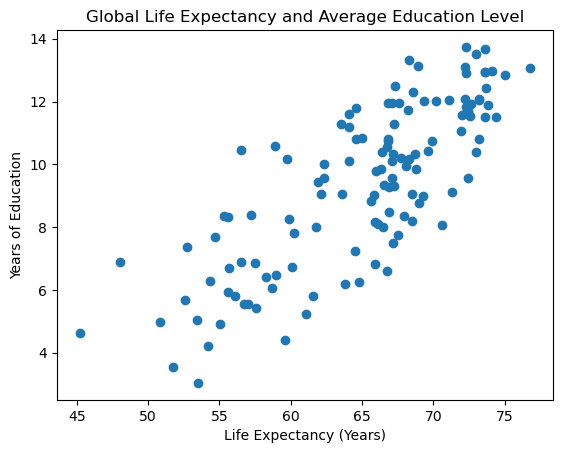

In [20]:
life = happiness_edu_df["Healthy life expectancy"]
years = happiness_edu_df["Avg Ed. (Years)"]
country = happiness_edu_df["Country name"]
plt.scatter(life, years, label=country)
plt.xlabel("Life Expectancy (Years)")
plt.ylabel("Years of Education")
plt.title("Global Life Expectancy and Average Education Level")
plt.show()

In [21]:
import seaborn as sns
import mplcursors

In [22]:
%matplotlib inline
%matplotlib widget
# !pip install ipympl

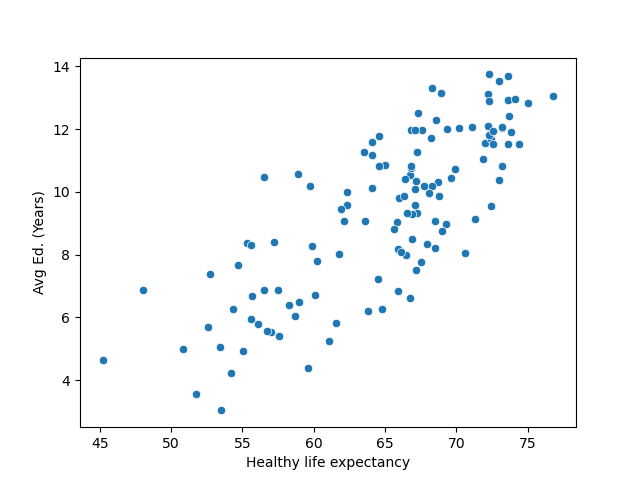

In [23]:
sns.scatterplot(data=happiness_edu_df, x="Healthy life expectancy", y="Avg Ed. (Years)")

cursor = mplcursors.cursor(hover=True)
cursor.connect("add", lambda sel: sel.annotation.set_text(
    f'Life Expectancy: {sel.target[0]:.2f}\nAverage Years of Education: {sel.target[1]:.2f}'
))


plt.show()

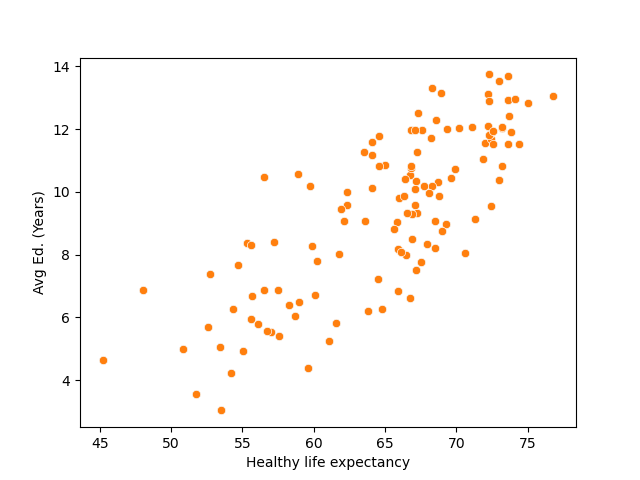

In [24]:
sns.scatterplot(data=happiness_edu_df, x="Healthy life expectancy", y="Avg Ed. (Years)")

mplcursors.cursor()

plt.show()

In [25]:
# Create scatter plot with Plotly


fig_life = px.scatter(happiness_edu_df, x="Healthy life expectancy", y="Avg Ed. (Years)", hover_name="Country name", trendline="ols", color_continuous_scale="Sunsetdark")

# Customize layout
fig_life.update_layout(
    title="Life Expectancy and average years of education achieved",
    xaxis_title="Healthy Life Expectancy",
    yaxis_title="Average Years of Education"
 
)

# Show the plot
fig_life.show()

In [26]:
# Create scatter plot with Plotly

fig_social = px.scatter(happiness_edu_df, x="Social support", y="Avg Ed. (Years)", hover_name="Country name", trendline="ols")

# Customize layout
fig_social.update_layout(
    title="Perceived Social Support and average years of education achieved",
    xaxis_title="Perceived Social Support",
    yaxis_title="Average Years of Education"
)

# Show the plot
fig_social.show()

In [27]:
# Create scatter plot with Plotly

fig_freedom = px.scatter(happiness_edu_df, x="Freedom to make life choices", y="Avg Ed. (Years)", hover_name="Country name", trendline="ols")

# Customize layout
fig_freedom.update_layout(
    title="Perceived Freedom to Make Life Choices and average years of education achieved",
    xaxis_title="Perceived Freedom to Make Life Choices",
    yaxis_title="Average Years of Education"
)

# Show the plot
fig_freedom.show()

In [28]:
# Write dataframe to .csv

# happiness_edu_df.to_csv("happiness_edu.csv")

In [29]:
# Write html files for each plot

pio.write_html(fig_life,"healthy_life_expectancy_avg_edu.html")
pio.write_html(fig_social,"individual_social_support_avg_edu.html")
pio.write_html(fig_freedom,"freedom_to_make_choices_avg_edu.html")

In [30]:
# Create .png images for each plot

# pio.write_image(fig_life,"Life expectancy vs. avg edu.png")
# pio.write_image(fig_social,"Social support vs. avg edu.png")
# pio.write_image(fig_freedom,"freedom to make life choices vs. avg edu.png")

In [31]:
# ! pip install -U kaleido

In [ ]:
# pio.write_image(fig_life,"Life expectancy vs. avg edu.png")
# pio.write_image(fig_social,"Social support vs. avg edu.png")
# pio.write_image(fig_freedom,"freedom to make life choices vs. avg edu.png")

In [ ]:


json_data_life = pio.to_json(fig_life)
json_data_social = pio.to_json(fig_social)
json_data_freedom = pio.to_json(fig_freedom)

In [ ]:
json_data_life

'{"data":[{"hovertemplate":"<b>%{hovertext}</b><br><br>Healthy life expectancy=%{x}<br>Avg Ed. (Years)=%{y}<extra></extra>","hovertext":["Afghanistan","Albania","Algeria","Argentina","Armenia","Australia","Austria","Bahrain","Bangladesh","Belgium","Benin","Bolivia","Botswana","Brazil","Bulgaria","Burundi","Cambodia","Cameroon","Canada","Central African Republic","Chile","China","Colombia","Costa Rica","Croatia","Cyprus","Denmark","Dominican Republic","Ecuador","Egypt","El Salvador","Estonia","Finland","France","Gabon","Gambia","Germany","Ghana","Greece","Guatemala","Haiti","Honduras","Hungary","Iceland","India","Indonesia","Iran","Iraq","Ireland","Israel","Italy","Jamaica","Japan","Jordan","Kazakhstan","Kenya","Kuwait","Kyrgyzstan","Laos","Latvia","Lesotho","Liberia","Libya","Lithuania","Luxembourg","Malawi","Malaysia","Maldives","Mali","Malta","Mauritania","Mauritius","Mexico","Moldova","Mongolia","Morocco","Mozambique","Myanmar","Namibia","Nepal","Netherlands","New Zealand","Nicaragu

In [ ]:
json_data_social

'{"data":[{"hovertemplate":"<b>%{hovertext}</b><br><br>Social support=%{x}<br>Avg Ed. (Years)=%{y}<extra></extra>","hovertext":["Afghanistan","Albania","Algeria","Argentina","Armenia","Australia","Austria","Bahrain","Bangladesh","Belgium","Benin","Bolivia","Botswana","Brazil","Bulgaria","Burundi","Cambodia","Cameroon","Canada","Central African Republic","Chile","China","Colombia","Costa Rica","Croatia","Cyprus","Denmark","Dominican Republic","Ecuador","Egypt","El Salvador","Estonia","Finland","France","Gabon","Gambia","Germany","Ghana","Greece","Guatemala","Haiti","Honduras","Hungary","Iceland","India","Indonesia","Iran","Iraq","Ireland","Israel","Italy","Jamaica","Japan","Jordan","Kazakhstan","Kenya","Kuwait","Kyrgyzstan","Laos","Latvia","Lesotho","Liberia","Libya","Lithuania","Luxembourg","Malawi","Malaysia","Maldives","Mali","Malta","Mauritania","Mauritius","Mexico","Moldova","Mongolia","Morocco","Mozambique","Myanmar","Namibia","Nepal","Netherlands","New Zealand","Nicaragua","Niger

In [ ]:
json_data_freedom

'{"data":[{"hovertemplate":"<b>%{hovertext}</b><br><br>Freedom to make life choices=%{x}<br>Avg Ed. (Years)=%{y}<extra></extra>","hovertext":["Afghanistan","Albania","Algeria","Argentina","Armenia","Australia","Austria","Bahrain","Bangladesh","Belgium","Benin","Bolivia","Botswana","Brazil","Bulgaria","Burundi","Cambodia","Cameroon","Canada","Central African Republic","Chile","China","Colombia","Costa Rica","Croatia","Cyprus","Denmark","Dominican Republic","Ecuador","Egypt","El Salvador","Estonia","Finland","France","Gabon","Gambia","Germany","Ghana","Greece","Guatemala","Haiti","Honduras","Hungary","Iceland","India","Indonesia","Iran","Iraq","Ireland","Israel","Italy","Jamaica","Japan","Jordan","Kazakhstan","Kenya","Kuwait","Kyrgyzstan","Laos","Latvia","Lesotho","Liberia","Libya","Lithuania","Luxembourg","Malawi","Malaysia","Maldives","Mali","Malta","Mauritania","Mauritius","Mexico","Moldova","Mongolia","Morocco","Mozambique","Myanmar","Namibia","Nepal","Netherlands","New Zealand","Nic

In [ ]:
#Write .json files for each plot

# with open('life_scatter_plot.json', 'w') as f:
#     f.write(fig_life.to_json())

# with open('social_scatter_plot.json', 'w') as f:
#     f.write(fig_social.to_json())

# with open('freedom_scatter_plot.json', 'w') as f:
#     f.write(fig_freedom.to_json())